# Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
train_df = pd.read_csv('train_data.csv')

In [45]:
test_df = pd.read_csv('test_data.csv')

In [46]:
sample_df = pd.read_csv('sample.csv')

In [47]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [48]:
len(train_df)

54808

In [49]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [50]:
len(test_df)

23490

In [51]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [52]:
test_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [54]:
#creating new df to keep master df safe
clone_train = pd.DataFrame()
clone_train = train_df

# Feature Exploration

Text(0.5, 1.0, 'representation of null values on features')

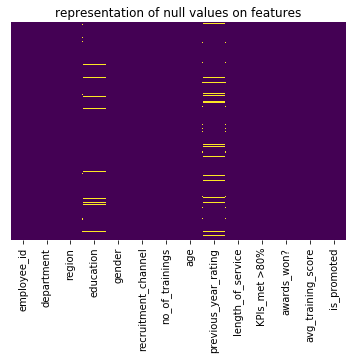

In [60]:
sns.heatmap(clone_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('representation of null values on features')

removing employee_id column for better analysis

In [13]:
clone_train.drop('employee_id',axis=1,inplace=True)

In [14]:
clone_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
model_df = pd.DataFrame()

<b> Feature :</b> department 

<b>Description :</b> Name of the department employee belongs to

In [16]:
clone_train.department.isnull().sum()

0

In [17]:
len(clone_train.department.unique())

9

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

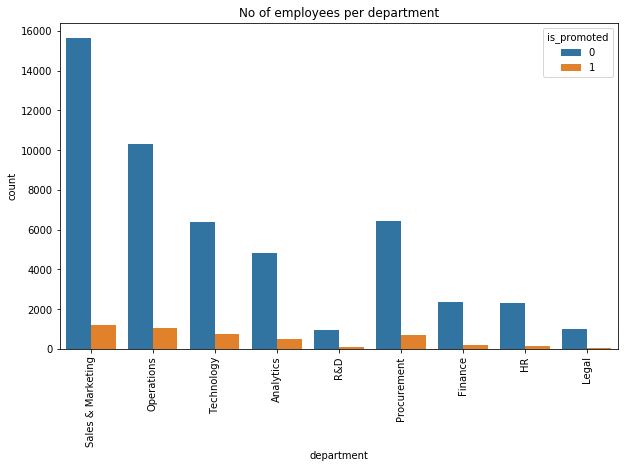

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(data=clone_train,x=clone_train.department,hue=clone_train.is_promoted)
plt.title("No of employees per department")
plt.xticks(rotation=90)

In [19]:
model_df['department'] = clone_train['department']

<b> Feature :</b> education 

<b>Description :</b> Highest qualification of employees

In [20]:
clone_train.education.isnull().sum()

2409

In [21]:
clone_train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [22]:
clone_train.education.fillna(method='ffill',inplace=True)

In [23]:
clone_train.education.value_counts()

Bachelor's          38390
Master's & above    15579
Below Secondary       839
Name: education, dtype: int64

Text(0.5, 1.0, 'No of employess count with higest qualification')

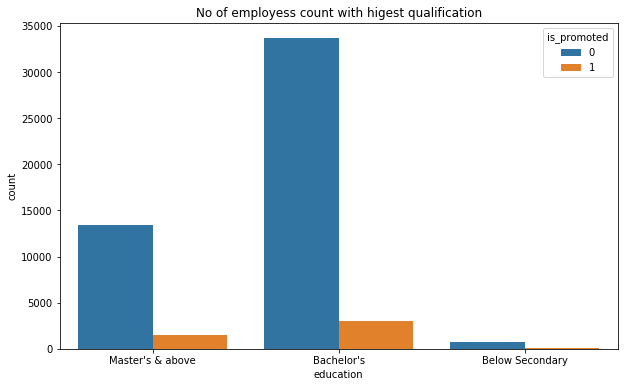

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(data=clone_train,x=clone_train.education,hue=clone_train.is_promoted)
plt.title("No of employess count with higest qualification")

In [25]:
model_df['education'] = clone_train['education']

In [26]:
model_df.head()

,department,education
0,Sales & Marketing,Master's & above
1,Operations,Bachelor's
2,Sales & Marketing,Bachelor's
3,Sales & Marketing,Bachelor's
4,Technology,Bachelor's


<b> Feature :</b> gender 

<b>Description :</b> Male & Female

In [27]:
clone_train.gender.isnull().sum()

0

Text(0.5, 1.0, 'male female promoted ratio')

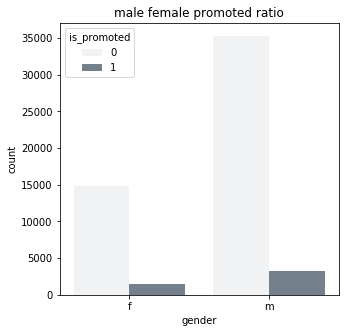

In [106]:
plt.figure(figsize=(5,5))
sns.countplot(data=clone_train,x=clone_train.gender,hue=clone_train.is_promoted,color='slategray')
plt.title("male female promoted ratio")

In [30]:
model_df['gender'] = clone_train['gender']

<b> Feature :</b> recruitment_channel 

<b>Description :</b> Employee recruited from

In [31]:
clone_train.recruitment_channel.isnull().sum()

0

Text(0.5, 1.0, 'Employee recruitment channel')

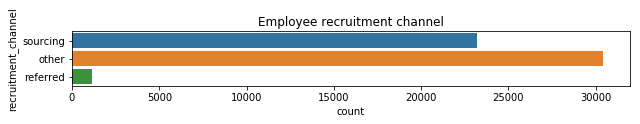

In [32]:
plt.figure(figsize=(10,1))
sns.countplot(data=clone_train,y=clone_train.recruitment_channel)
plt.title("Employee recruitment channel")


<b> Feature :</b> no_of_trainings 

<b>Description :</b> No of trainings taken by the employee

In [33]:
clone_train.no_of_trainings.isnull().sum()

0

Text(0.5, 1.0, 'No of trainings taken by the no of employees')

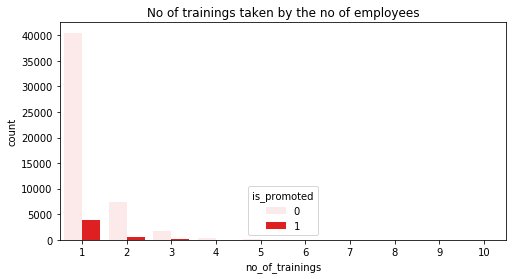

In [102]:
plt.figure(figsize=(8,4))
sns.countplot(data=clone_train,x=clone_train.no_of_trainings,hue=clone_train.is_promoted,color='red')
plt.title("No of trainings taken by the no of employees")

In [35]:
model_df['no_of_trainings'] = clone_train['no_of_trainings']

<b> Feature :</b> Age 

<b>Description :</b> Age of employee

Text(0.5, 1.0, 'number of employee by their age')

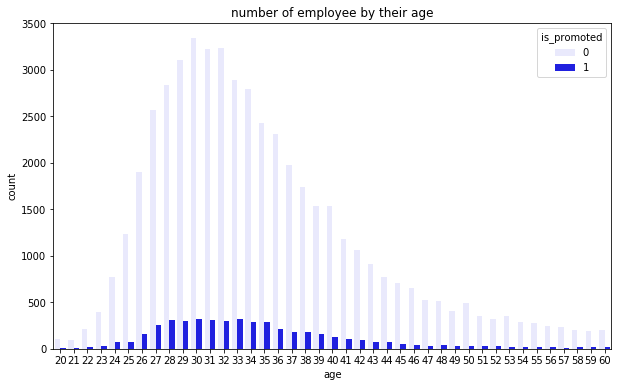

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(data=clone_train,x=clone_train.age,hue=clone_train.is_promoted,color='blue')
plt.title('number of employee by their age')

In [37]:
model_df['age'] = clone_train['age']

<b> Feature :</b> previous_year_rating 

<b>Description :</b> Previous year rating

In [77]:
clone_train.previous_year_rating.isnull().sum()

4124

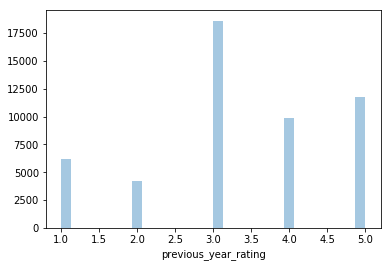

In [80]:
sns.distplot(clone_train['previous_year_rating'].dropna(),kde=False,bins=30)

In [85]:
print(clone_train.loc[clone_train['gender']=='m']['previous_year_rating'].mean())
print(clone_train.loc[clone_train['gender']=='f']['previous_year_rating'].mean())

3.309316070925978
3.3760063349610663


In [40]:
clone_train.previous_year_rating.mean()

3.329255780917055

In [86]:
clone_train.previous_year_rating.fillna(3.0,inplace=True)

In [87]:
clone_train.previous_year_rating.isnull().sum()

0

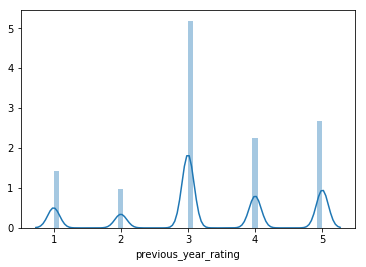

In [88]:
sns.distplot(clone_train.previous_year_rating)

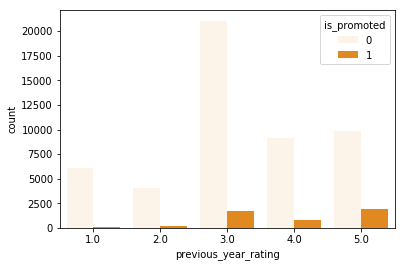

In [107]:
sns.countplot(data=clone_train, x='previous_year_rating',hue='is_promoted',color='darkorange')

In [109]:
model_df['previous_year_rating'] = clone_train['previous_year_rating']

<b> Feature :</b> length_of_service 

<b>Description :</b> Years of employment

In [111]:
clone_train.length_of_service.isnull().sum()

0

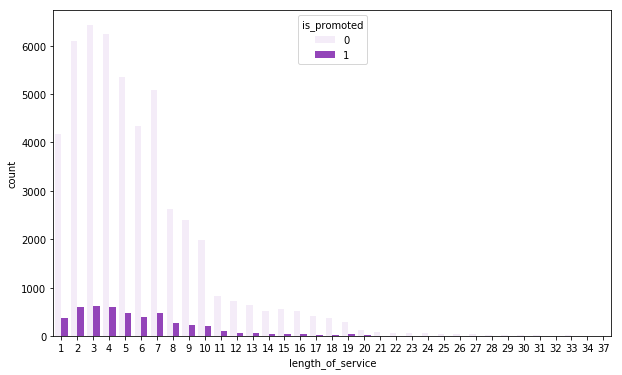

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(data=clone_train, x='length_of_service',hue='is_promoted',color='darkorchid')

In [118]:
model_df['length_of_service'] = clone_train['length_of_service']

<b> Feature :</b> KPIs_met >80% 

<b>Description :</b> Key Performance Indicators meeting criteria 

In [121]:
clone_train.rename(columns={'KPIs_met >80%':'kpi'},inplace=True)

In [122]:
clone_train.kpi.isnull().sum()

0

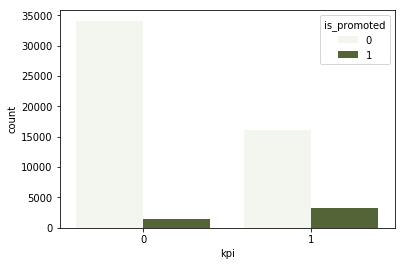

In [125]:
sns.countplot(data=clone_train, x='kpi',hue='is_promoted',color='darkolivegreen')

In [126]:
model_df['kpi'] = clone_train['kpi']

In [127]:
model_df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,kpi
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1
1,Operations,Bachelor's,m,1,30,5.0,4,0
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0
4,Technology,Bachelor's,m,1,45,3.0,2,0


<b> Feature :</b> awards_won? 

<b>Description :</b> Employee awards

In [130]:
clone_train.rename(columns={'awards_won?':'isaward_won'},inplace=True)

In [131]:
clone_train.isaward_won.isnull().sum()

0

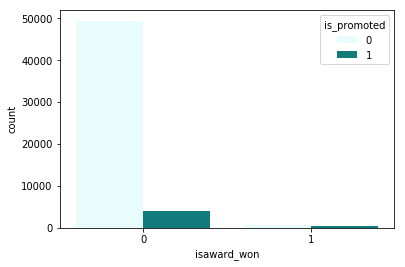

In [133]:
sns.countplot(data=clone_train, x='isaward_won',hue='is_promoted',color='darkcyan')

In [134]:
model_df['isaward_won'] = clone_train['isaward_won']

<b> Feature :</b> avg_training_score 

<b>Description :</b> Traning score

In [135]:
clone_train.avg_training_score.isnull().sum()

0

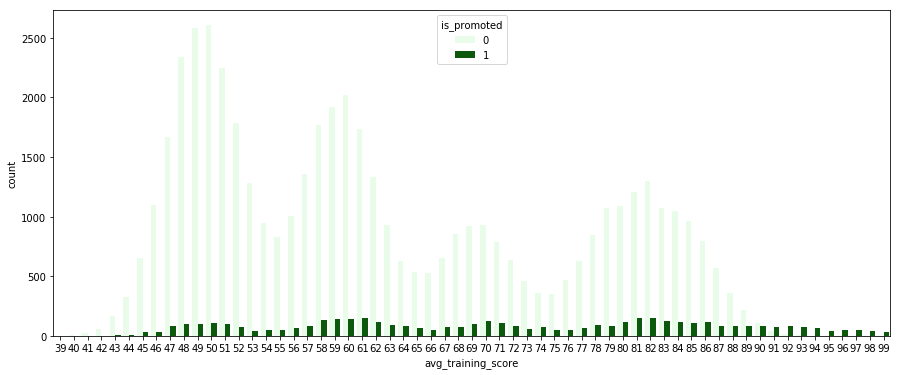

In [139]:
plt.figure(figsize=(15,6))
sns.countplot(data=clone_train, x='avg_training_score',hue='is_promoted',color='darkgreen')

In [140]:
model_df['avg_training_score'] = clone_train['avg_training_score']

In [141]:
model_df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,kpi,isaward_won,avg_training_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73


# Feature Encoding

creating new dataframe for encoding

In [160]:
encode_bin = pd.DataFrame()
encode_bin = model_df

In [161]:
encode_bin.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,kpi,isaward_won,avg_training_score
0,Sales & Marketing,2,f,1,35,5.0,8,1,0,49
1,Operations,0,m,1,30,5.0,4,0,0,60
2,Sales & Marketing,0,m,1,34,3.0,7,0,0,50
3,Sales & Marketing,0,m,2,39,1.0,10,0,0,50
4,Technology,0,m,1,45,3.0,2,0,0,73


We have tree categorical columns (department,education,gender) to convert into continous features. education column can be nomimal so we can use LableEncoding and for department and gender we can use OneHotEncoding because the are ordinal category.

In [162]:
gender_onehot_df = pd.get_dummies(encode_bin['gender'],prefix='gender')

In [163]:
department_onehot_df = pd.get_dummies(encode_bin['department'],prefix='department')

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
le = LabelEncoder()

In [166]:
encode_bin['education'] = le.fit_transform(encode_bin['education'])

In [167]:
encode_bin= pd.concat([encode_bin,gender_onehot_df,department_onehot_df],axis=1)

In [168]:
encode_bin.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,kpi,isaward_won,avg_training_score,...,gender_m,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,Sales & Marketing,2,f,1,35,5.0,8,1,0,49,...,0,0,0,0,0,0,0,0,1,0
1,Operations,0,m,1,30,5.0,4,0,0,60,...,1,0,0,0,0,1,0,0,0,0
2,Sales & Marketing,0,m,1,34,3.0,7,0,0,50,...,1,0,0,0,0,0,0,0,1,0
3,Sales & Marketing,0,m,2,39,1.0,10,0,0,50,...,1,0,0,0,0,0,0,0,1,0
4,Technology,0,m,1,45,3.0,2,0,0,73,...,1,0,0,0,0,0,0,0,0,1


In [171]:
encode_bin.drop(['department','gender'],axis=1,inplace=True)

In [173]:
encode_bin.head(2)

,education,no_of_trainings,age,previous_year_rating,length_of_service,kpi,isaward_won,avg_training_score,gender_f,gender_m,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,2,1,35,5.0,8,1,0,49,1,0,0,0,0,0,0,0,0,1,0
1,0,1,30,5.0,4,0,0,60,0,1,0,0,0,0,1,0,0,0,0


# Features Selection

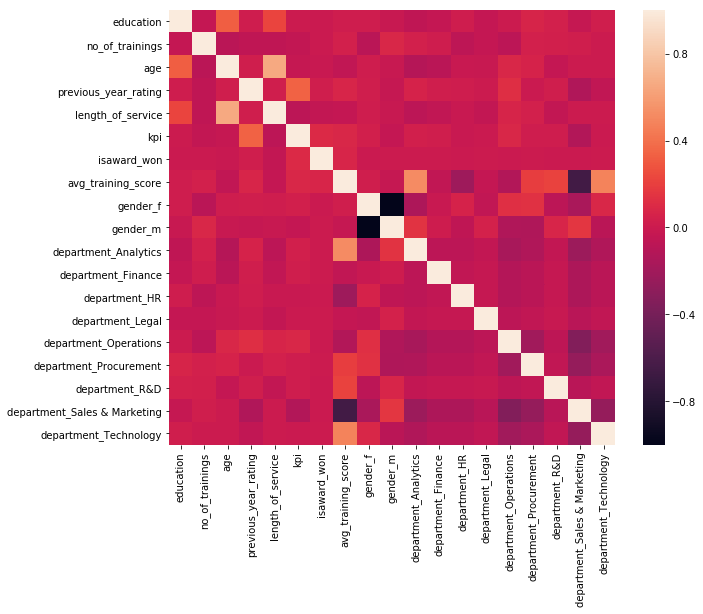

In [185]:
plt.figure(figsize=(10,8))
sns.heatmap(encode_bin.corr())